# Example
Consider the following deterministic problem


\begin{array}{rl}
\min & vx + 3y\\
& 3\leq x\leq 10\\
& x+y\geq 8\\
& y\geq0
\end{array}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/wl/8s06c36n7dbf3wr2b0q2n4kh0000gn/T/ipykernel_73819/256808149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
v=5


### solving the deterministic problem

In [3]:
#use guroby


## In a stochastic context we may assume that v is unknown, buy described by a random varible V
$$
V \sim \mathcal{N}(2,2^2)
$$

In [4]:
#Building a sample of V
n=100
V =pd.Series(2 + 2*np.random.randn(n))

In [5]:
V

0     1.900853
1     3.244664
2     3.664231
3     4.571889
4     2.560081
        ...   
95   -0.807449
96    5.241836
97   -1.185483
98    1.339811
99   -1.661413
Length: 100, dtype: float64

<Axes: ylabel='Frequency'>

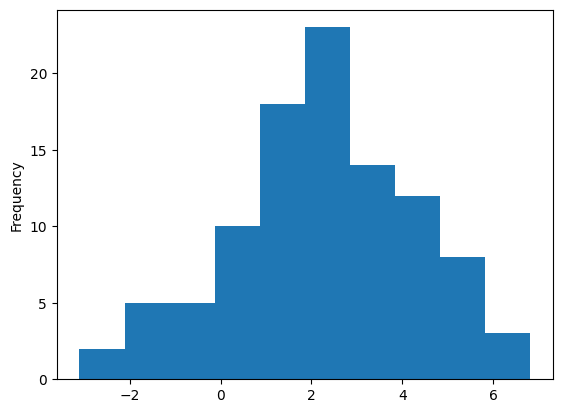

In [6]:
V.plot(kind='hist')

<Axes: ylabel='Density'>

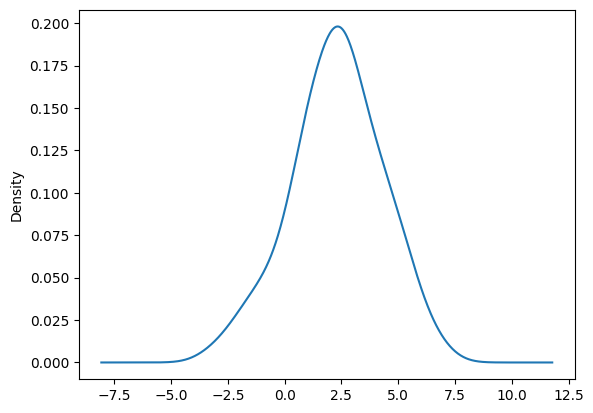

In [7]:
V.plot(kind='density')

In [8]:
## computing the output distribution for a decision (x,y)
x=4
y=4
cost = x*V+3*y

In [9]:
cost

0     19.603412
1     24.978657
2     26.656925
3     30.287556
4     22.240326
        ...    
95     8.770203
96    32.967343
97     7.258068
98    17.359243
99     5.354349
Length: 100, dtype: float64

<Axes: ylabel='Frequency'>

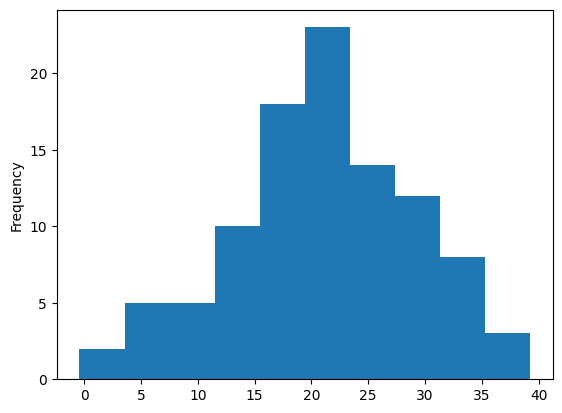

In [10]:
cost.plot(kind='hist')

In [12]:
## computing the output distribution for a decision (x,y)
x=3
y=8
cost = x*V+3*y

<Axes: ylabel='Frequency'>

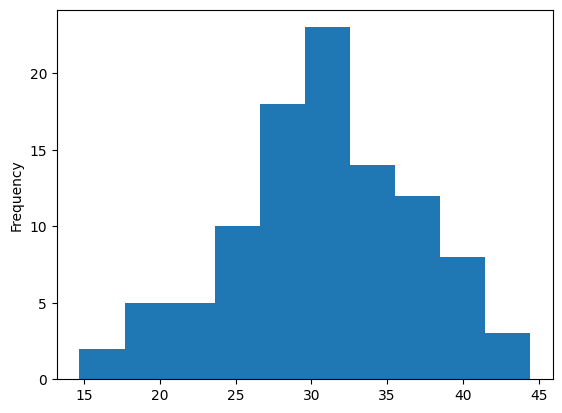

In [13]:
cost.plot(kind='hist')

In [14]:
## computing the output distribution for a decision (x,y)
x=8
y=0
cost = x*V+3*y

<Axes: ylabel='Frequency'>

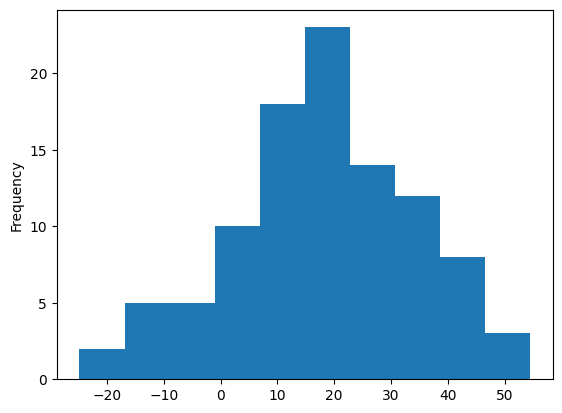

In [15]:
cost.plot(kind='hist')

### Considering the RISK NEUTRAL case

\begin{array}{rl}
\min & \mathbb{E}[Vx + 3y] =\color{red}{\mathbb{E}[Vx] + 3y =x\mathbb{E}[V] + 3y}\\
& 3\leq x\leq 10\\
& x+y\geq 8\\
& y\geq0
\end{array}


\begin{array}{rl}
\min & \sum_{i=1}^m\mathbb{P}(\omega_i)[V(\omega_i)x + 3y]\\
& 3\leq x\leq 10\\
& x+y\geq 8\\
& y\geq0
\end{array}


In [16]:
## solving using gurobi
import gurobipy as gp
m = gp.Model()
x = m.addVar(lb=3,ub=10)
y= m.addVar(lb=0)
m.addConstr(x+y>=8)
objFun = gp.quicksum( (1/len(V))*(V[i]*x+3*y) for i in V.index)
m.setObjective(objFun, sense=gp.GRB.MINIMIZE)

m.optimize()


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-11
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0x9c3f78b4
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [3e+00, 1e+01]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8242517e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.824251694e+01


In [18]:
x.X

8.0

In [19]:
y.X

0.0

In [20]:
## computing the output distribution for a decision (x,y)
x=8
y=0
cost = x*V+3*y

<Axes: ylabel='Frequency'>

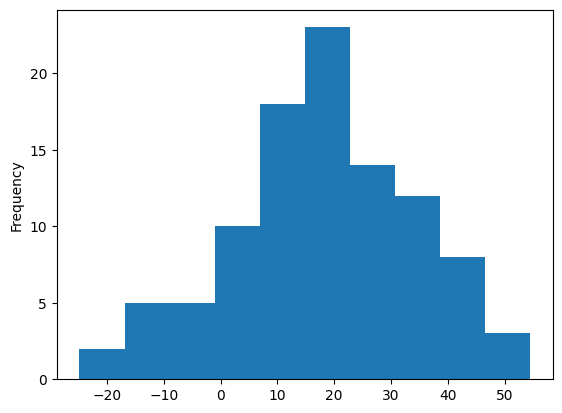

In [21]:
cost.plot(kind='hist')

In [22]:
cost.describe()

count    100.000000
mean      18.242517
std       15.914274
min      -24.843281
25%        8.755883
50%       19.119117
75%       29.153762
max       54.544537
dtype: float64

### minimizing the variance


In [23]:
## solving using gurobi
import gurobipy as gp
m = gp.Model()
x = m.addVar(lb=3,ub=10)
y= m.addVar(lb=0)
m.addConstr(x+y>=8)
objFun = gp.quicksum( (1/len(V))*(V[i]*x - 2*x)*(V[i]*x - 2*x) for i in V.index)
m.setObjective(objFun, sense=gp.GRB.MINIMIZE)

m.optimize()


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0x7781679e
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 8e+00]
  Bounds range     [3e+00, 1e+01]
  RHS range        [8e+00, 8e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 3.59663009e+01


In [24]:
x.X

3.0

In [25]:
y.X

5.0

In [26]:
## computing the output distribution for a decision (x,y)
x=3
y=5
cost = x*V+3*y

<Axes: ylabel='Frequency'>

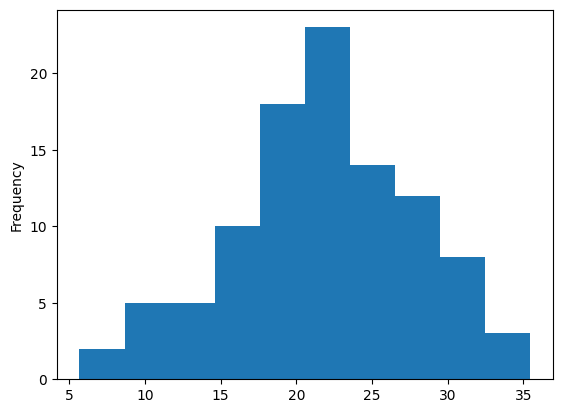

In [27]:
cost.plot(kind='hist')

In [28]:
cost.describe()

count    100.000000
mean      21.840944
std        5.967853
min        5.683770
25%       18.283456
50%       22.169669
75%       25.932661
max       35.454202
dtype: float64

### The Perfect Information Distribution (PID)

In [51]:
## Computing the wait and see (WS) soluiton
def wsv(vw):
    m = gp.Model()
    x = m.addVar(lb=3,ub=10)
    y= m.addVar(lb=0)
    m.addConstr(x+y>=8)
    objFun = vw*x+3*y
    m.setObjective(objFun, sense=gp.GRB.MINIMIZE)

    m.optimize()
    return x.X, y.X, objFun.getValue()

In [52]:
wsv(45)

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0x4a289b5b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 4e+01]
  Bounds range     [3e+00, 1e+01]
  RHS range        [8e+00, 8e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.500000000e+02


(3.0, 5.0, 150.0)

In [53]:
PID = pd.DataFrame([wsv(V[i]) for i in V.index ], columns=['ws_x', 'ws_y', 'PID'])

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xa0925a57
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [3e+00, 1e+01]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.00s
Presolved: 1 rows, 2 columns, 2 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5206823e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.520682341e+01
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xc704880d
Coefficient statistic

In [54]:
PID['V'] = V

In [55]:
PID

,ws_x,ws_y,PID,V
0,8.0,0.0,15.206823,1.900853
1,3.0,5.0,24.733993,3.244664
2,3.0,5.0,25.992694,3.664231
3,3.0,5.0,28.715667,4.571889
4,8.0,0.0,20.480651,2.560081
...,...,...,...,...
95,10.0,0.0,-8.074492,-0.807449
96,3.0,5.0,30.725507,5.241836
97,10.0,0.0,-11.854831,-1.185483
98,8.0,0.0,10.718486,1.339811


<Axes: ylabel='Frequency'>

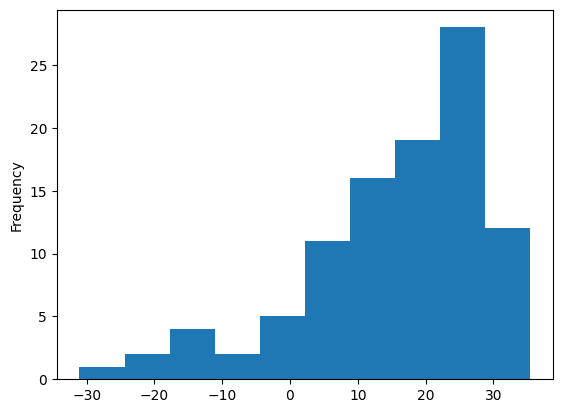

In [56]:
PID['PID'].plot(kind='hist')

In [57]:
PID['PID'].describe()

count    100.000000
mean      15.585385
std       13.677935
min      -31.054101
25%        8.755883
50%       19.119117
75%       25.932661
max       35.454202
Name: PID, dtype: float64

### Computing the Expected value of perfect information  (EVPI) 

# EVPI =  E(value of the decisions) - E[PID]
x=8
y=0
cost = x*V+3*y
EVPI = cost.mean() - PID['PID'].mean()


In [59]:
EVPI

2.6571315179461816

In [60]:
EVPI/cost.mean()

0.14565597094999666

## The Expected Value Distribution (EVD)

In [61]:
ev= V.mean()
x,y, _ = wsv(ev)

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xb5ef7905
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [3e+00, 1e+01]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.00s
Presolved: 1 rows, 2 columns, 2 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8242517e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.824251694e+01


In [62]:
x

8.0

In [63]:
y

0.0

In [64]:
EVD = V*x+ 3*y

<Axes: ylabel='Frequency'>

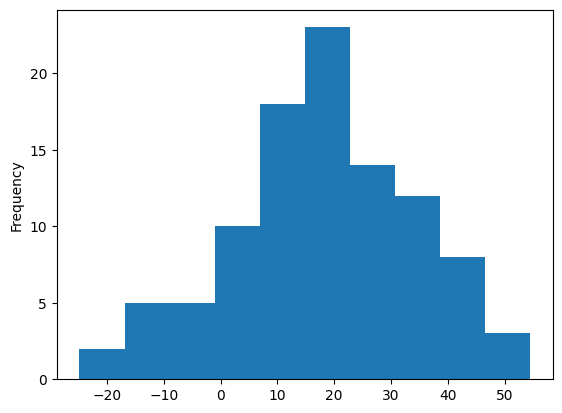

In [65]:
EVD.plot(kind='hist')

### Computing the value of the Stochastic solution (VSS)

In [66]:
vss = EVD.mean() - cost.mean()

In [67]:
vss

0.0